In [ ]:
import torch
import torch.nn as nn
import math
import matplotlib.pyplot as plt


In [7]:
from torch.utils.tensorboard import SummaryWriter

In [17]:
# Whaqt torch.nn.Embedding returns
embed = nn.Embedding(10000, 512)

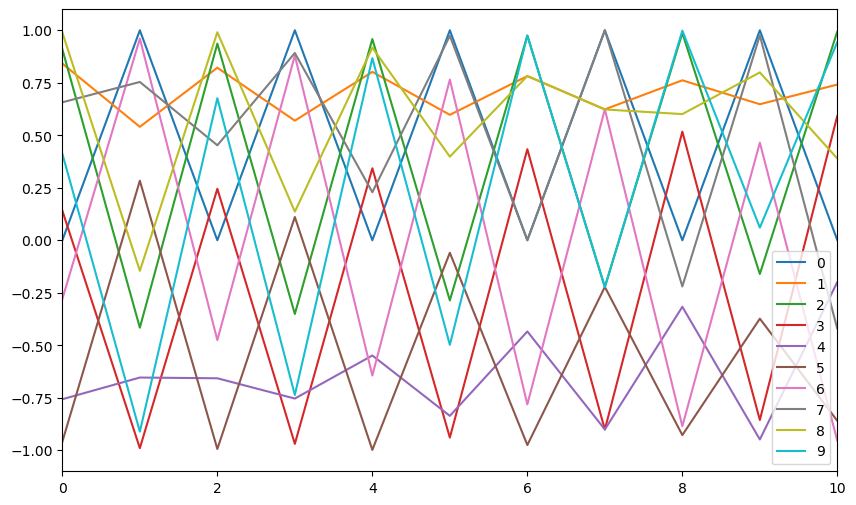

In [34]:
# Positional Encoding
# 2. positional encoding
class PositionalEncoding(nn.Module):
    def __init__(self, d_model:int, seq_len: int, dropout: float) -> None:
        super().__init__()
        self.d_model = d_model
        self.seq_len = seq_len
        self.dropout = dropout

        # create a matric of shape (seq_len, d_model)
        pe = torch.zeros(seq_len, d_model)
        # making a vector of shape (seq_len, 1)
        position = torch.arange(0, seq_len, dtype=torch.float).unsqueeze(1) # (seq_len, 1)
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-math.log(10000.0) / d_model))
        pe[:,0::2] = torch.sin(position * div_term)
        pe[:,1::2] = torch.cos(position * div_term)

        pe = pe.unsqueeze(0) # (1, seq_len, d_model)

        self.register_buffer('pe', pe)

    def forward(self, x):
        x = x + (self.pe[:,:x.shape[1], :]).requires_grad(False) # we don't want the PE to be learnable
        return self.dropout(x)
    
d_model = 512
seq_len = 10
# create a matric of shape (seq_len, d_model)
pe = torch.zeros(seq_len, d_model)
# making a vector of shape (seq_len, 1)
position = torch.arange(0, seq_len, dtype=torch.float).unsqueeze(1) # (seq_len, 1)
div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-math.log(10000.0) / d_model))
pe[:,0::2] = torch.sin(position * div_term)
pe[:,1::2] = torch.cos(position * div_term)

fig, ax = plt.subplots(figsize=(10,6))

for i in range(pe.shape[0]):
    ax.plot([i for i in range(pe.shape[1])], pe[i,:], label=i)
ax.set_xlim(0,10)
ax.legend()
plt.show()


In [3]:
from  model import build_transformer_model
from torchsummary import summary

In [2]:
model = build_transformer_model(
        src_seq_len=20, 
        src_vocab_size=10000,
        tgt_seq_len=20,
        tgt_vocab_size=10000
    )

In [5]:
summary(model, input_size=[1,512])

TypeError: Value after * must be an iterable, not int

In [23]:
div_term

tensor([1.0000e+00, 9.6466e-01, 9.3057e-01, 8.9769e-01, 8.6596e-01, 8.3536e-01,
        8.0584e-01, 7.7737e-01, 7.4989e-01, 7.2339e-01, 6.9783e-01, 6.7317e-01,
        6.4938e-01, 6.2643e-01, 6.0430e-01, 5.8294e-01, 5.6234e-01, 5.4247e-01,
        5.2330e-01, 5.0481e-01, 4.8697e-01, 4.6976e-01, 4.5316e-01, 4.3714e-01,
        4.2170e-01, 4.0679e-01, 3.9242e-01, 3.7855e-01, 3.6517e-01, 3.5227e-01,
        3.3982e-01, 3.2781e-01, 3.1623e-01, 3.0505e-01, 2.9427e-01, 2.8387e-01,
        2.7384e-01, 2.6416e-01, 2.5483e-01, 2.4582e-01, 2.3714e-01, 2.2876e-01,
        2.2067e-01, 2.1288e-01, 2.0535e-01, 1.9810e-01, 1.9110e-01, 1.8434e-01,
        1.7783e-01, 1.7154e-01, 1.6548e-01, 1.5963e-01, 1.5399e-01, 1.4855e-01,
        1.4330e-01, 1.3824e-01, 1.3335e-01, 1.2864e-01, 1.2409e-01, 1.1971e-01,
        1.1548e-01, 1.1140e-01, 1.0746e-01, 1.0366e-01, 1.0000e-01, 9.6466e-02,
        9.3057e-02, 8.9769e-02, 8.6596e-02, 8.3536e-02, 8.0584e-02, 7.7736e-02,
        7.4989e-02, 7.2339e-02, 6.9783e-